# Linear Algebra in the Context of Linear Methods. Practice.

## Forecasting gas production at wells.

## Task Description

Vasily, the founder of Gaz-Taz-Vaz-Neft, is doing well: he already has 200 gas production wells in operation. This year, he is opening 30 new wells. However, in order to optimize expenses and increase income, Vasily needs to estimate how much money each well will bring him, as well as understand which factors (well parameters) will potentially have the greatest impact on gas production volumes. To do this, Vasily has decided to hire you as a Data Science specialist.

Vasily presents you with a dataset of gas production from his wells. You can download the data file from the platform.

**Data Attributes:**

* Well — well identifier;
* Por — wellbore porosity (%);
* Perm — wellbore permeability;
* AI — acoustic impedance (kg/m^2 * 10^6);
* Brittle — wellbore brittleness coefficient (%);
* TOC — total organic carbon (%);
* VR — vitrinite reflectivity (%);
* Prod — gas production per day (million cubic feet).

**Your task** - build a regression model that predicts gas production at a well (target feature - Prod) based on other well characteristics, and interpret the results of your model.

Let's split the task into two parts:
* In the first, we will build the simplest linear regression model, analyze its results, and select the most significant factors for forecasting.
* In the second, we will build a polynomial regression model with regularization and look at the final modeling results.

Import required libraries:

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
import sys

sys.path.append('../../')

from DataScienceHelpers.ExploratoryDataAnalysis import display_histograms
from sklearn import metrics

Reading the data:

In [3]:
data = pd.read_csv('../../data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Practice: Linear Regression via Ordinary Least Squares 

To begin, we will build the simplest linear regression model, analyze the results of its work and select the most significant factors for forecasting.

In the first part, you will have to complete tasks 5.0–5.6 below.

### Task 5.0.

Do some exploratory analysis to get to know the underlying data better. Create some visualizations that will help you understand how the underlying features are structured and will also be able to demonstrate the relationships between factors.

Draw some interim conclusions from the conducted EDA.

Basic data statistics:
              Por        Perm          AI     Brittle         TOC          VR  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean    14.991150    4.330750    2.968850   48.161950    0.990450    1.964300   
std      2.971176    1.731014    0.566885   14.129455    0.481588    0.300827   
min      6.550000    1.130000    1.280000   10.940000   -0.190000    0.930000   
25%     12.912500    3.122500    2.547500   37.755000    0.617500    1.770000   
50%     15.070000    4.035000    2.955000   49.510000    1.030000    1.960000   
75%     17.402500    5.287500    3.345000   58.262500    1.350000    2.142500   
max     23.550000    9.870000    4.630000   84.330000    2.180000    2.870000   

              Prod  
count   200.000000  
mean   4311.219852  
std     992.038414  
min    2107.139414  
25%    3618.064513  
50%    4284.687348  
75%    5086.089761  
max    6662.622385  

Check if the dataset has empty values:
Well       0
Por  

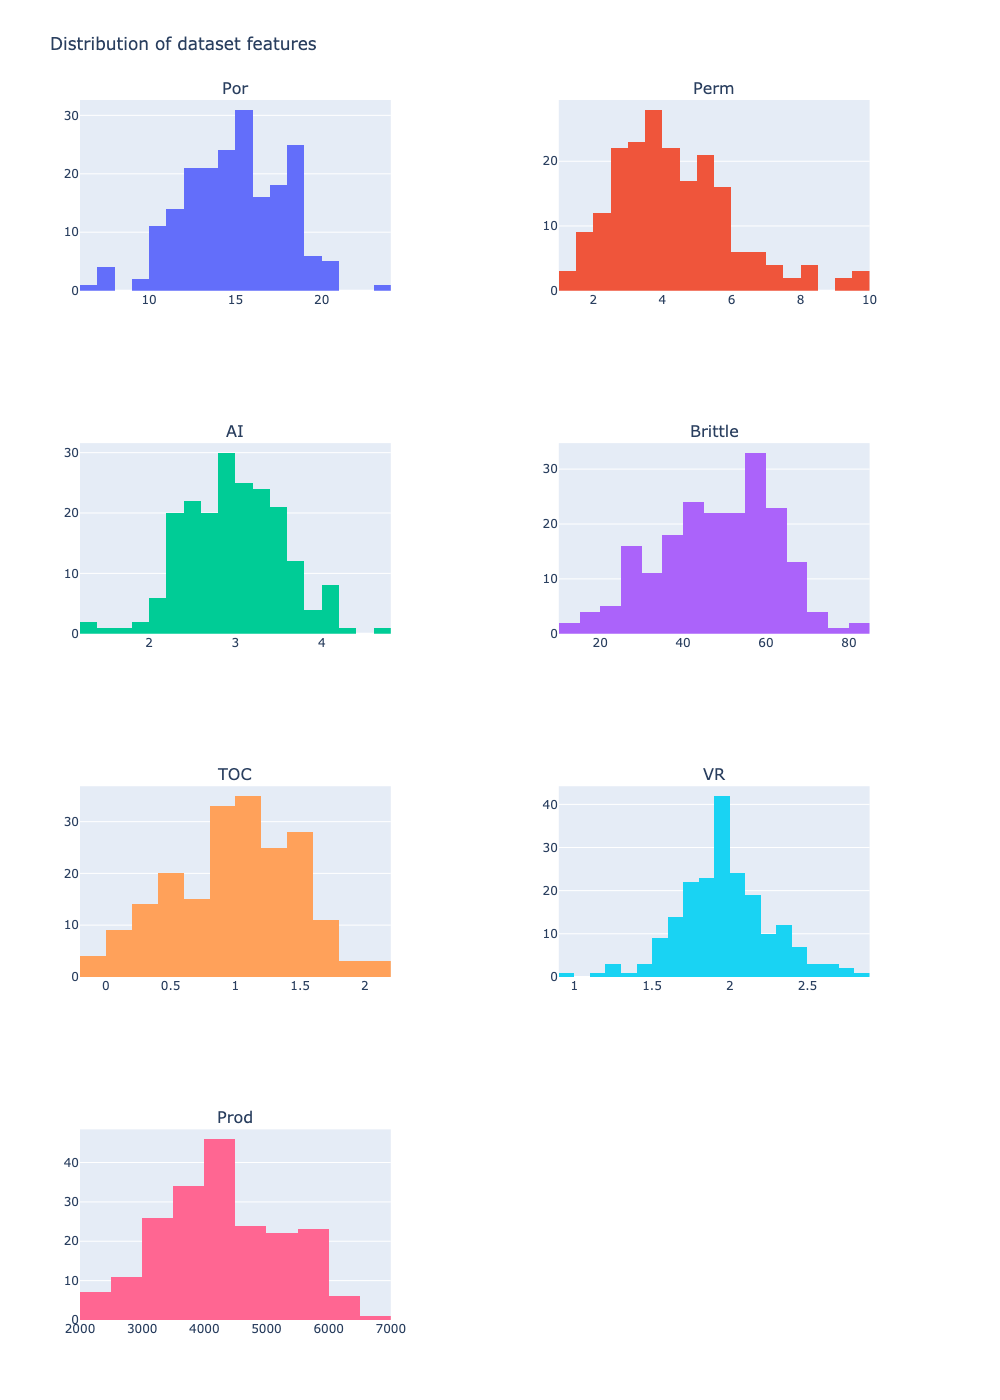

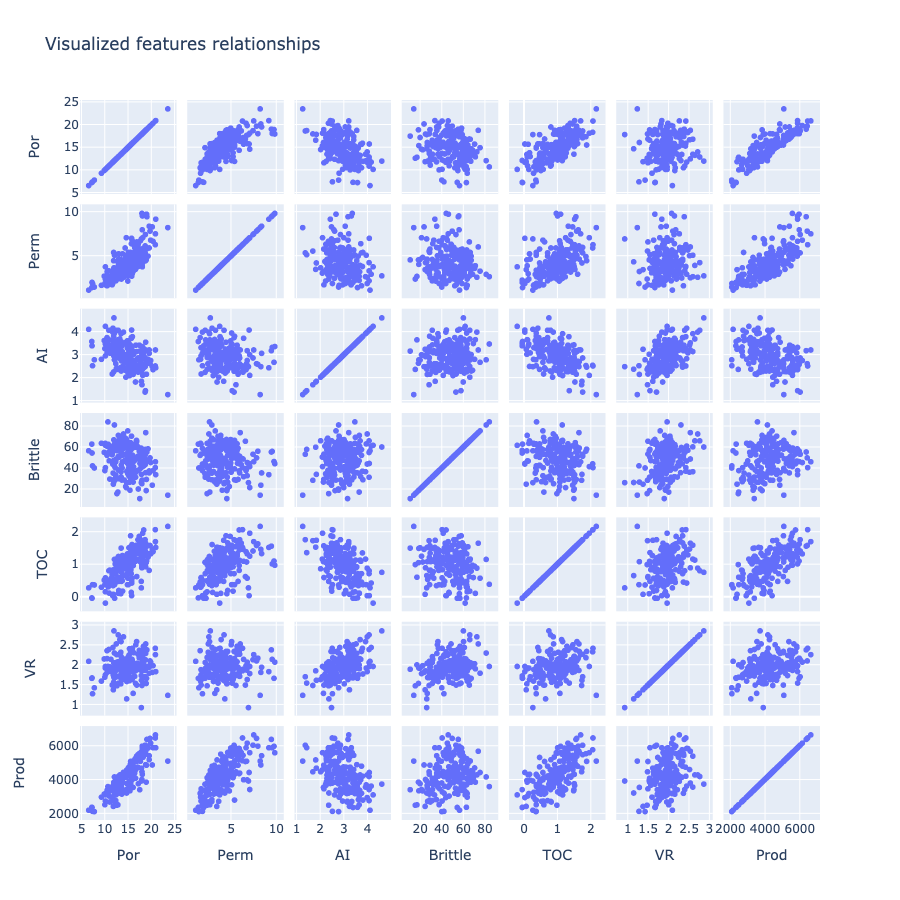

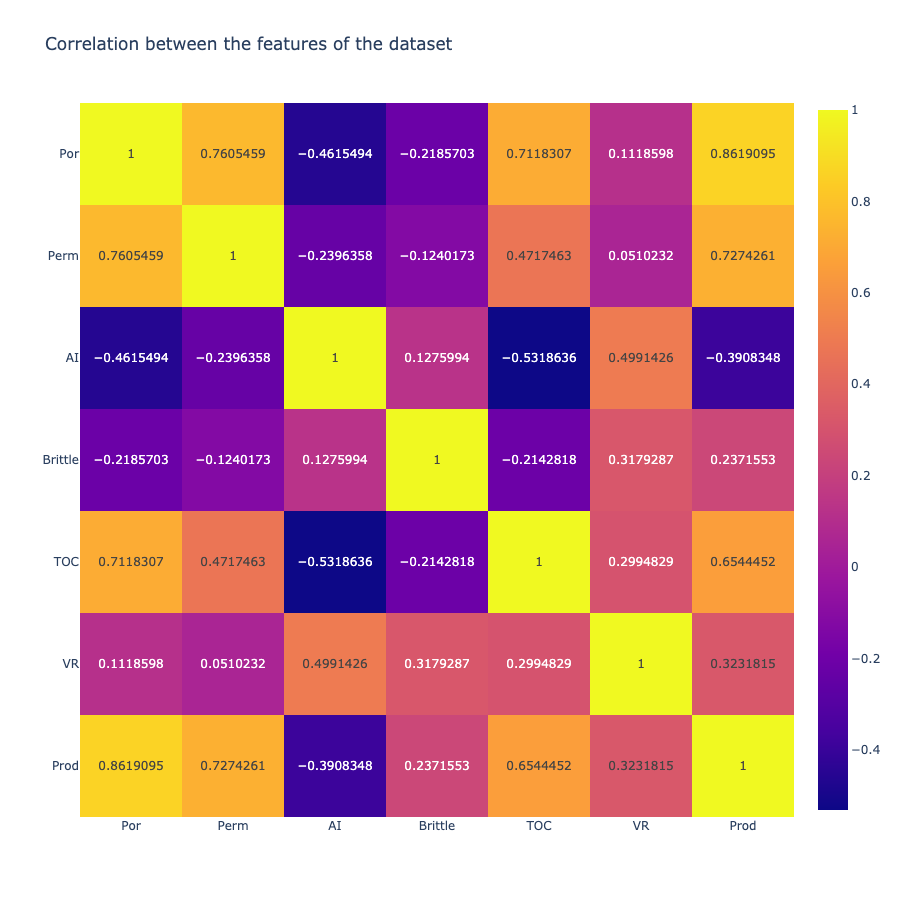

In [61]:
# Excluded the feature 'Well' from the further analysis since it is a pure identifier.
information_cols = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

print('Basic data statistics:')
print(data[information_cols].describe())

print()
print('Check if the dataset has empty values:')
print(data.isnull().sum())

print()
print('Check if the dataset has duplicates:')
print(data[data.duplicated()].sum())

# Use a helper method to present distribution of features via histograms.
display_histograms(
    data[information_cols],
    cols=2,
    row_height=350,
    title='Distribution of dataset features'
)

# Present feature relationships in the dataset.
fig = px.scatter_matrix(
    data,
    dimensions=information_cols,
    width=900,
    height=900,
    title='Visualized features relationships'
)
fig.show('png')

# Estimate multicollinearity in the dataset
fig = px.imshow(
    data[information_cols].corr(),
    text_auto=True,
    width=900,
    height=900,
    title='Correlation between the features of the dataset'
)
fig.show('png')

> **Conclusions:**
> 
> * Mean values are close to median values. 
> * Min and Max values of the factors don't signalize the presence of outliers.
> * The dataset does not have neither empty values nor duplicates.
> * Visualization via histograms shows that all features might have a normal distribution.
> * The target feature 'Prod' is multicollinear with the features 'Por' and 'Perm'.

### Task 5.1.

Construct a correlation matrix of factors, including the target feature in it.

For clarity, visualize the resulting matrix using a heat map.

**Note.** *For visualization, you can use any of the libraries you are familiar with.*

Based on the constructed correlation matrix, answer the following question:
* Which factors are most strongly correlated with the target variable?

Calculate the rank and determinant of the obtained correlation matrix and provide detailed answers to the following questions:
* Is the correlation matrix ill-conditioned (is its determinant close to zero)?
* What can you say about the presence of collinearity/multicollinearity in the data?
* Is the classical linear regression model using the least squares method applicable in this case and why?

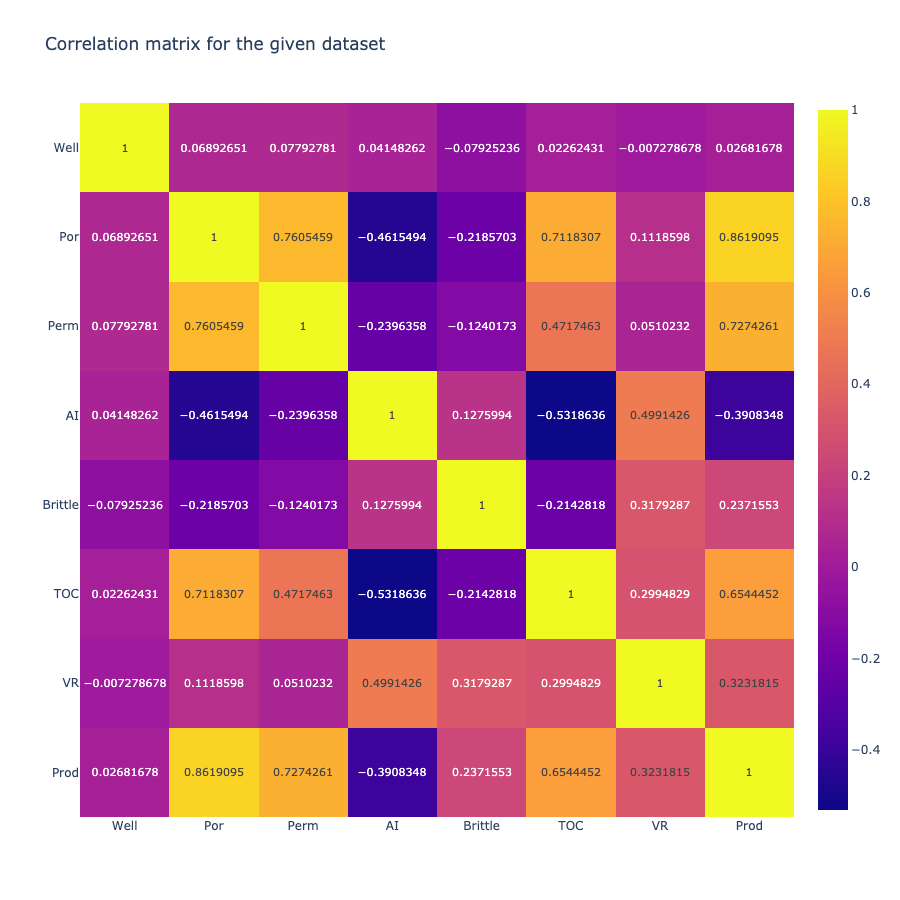

Rank of the correlation matrix:  8
Determinant of the correlation matrix:  0.0007299388072651707


In [60]:
cols = ['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']

# Standirdize the factor matrix.
A = np.array(data)
A_cent = A - A.mean(axis=0)
A_st = A_cent / np.linalg.norm(A_cent, axis=0)

# Construct a correlation matrix.
corr = A_st.T@A_st

# Visualize the correlation matrix.
fig = px.imshow(
    corr,
    text_auto=True,
    width=900,
    height=900,
    title='Correlation matrix for the given dataset'
).update_layout(
    xaxis=dict(
        tickvals = list(range(0, 8)),
        ticktext = cols
    ),
    yaxis=dict(
        tickvals = list(range(0, 8)),
        ticktext = cols
    )
)
fig.show('png')

corr_rank = np.linalg.matrix_rank(corr)
corr_det = np.linalg.det(corr)
print('Rank of the correlation matrix: ', corr_rank)
print('Determinant of the correlation matrix: ', corr_det)


> Conclusions:
> 
> 1. The values of the correlation matrix are the same as calculated in the course of the EDA with the standard means.
> 2. 'Por' (wellbore porosity (%)) and 'Perm' (wellbore permeability) are the two most correlated factors with the target variable 'Prod' (gas production per day).
> 3. Correlation matrix is close to be ill-conditioned, because the determinant value is close to zero (0.0007).
> 4. There is no collinearity in the data, but there is multicollinearity between:
> - the factors 'Por' (wellbore porosity (%)), 'Perm' (wellbore permeability) and the target variable 'Prod' (gas production per day).
> - the factors 'Por' (wellbore porosity (%)) and 'Perm' (wellbore permeability).
> - the factors 'Por' (wellbore porosity (%)) and 'TOC' (total organic carbon (%)).
> 5. The classical regression model using the Ordinary Least Squares is not applicable in this situation, because the data is ill-conditioned (determinant is close to zero). This means that the classically calculated inversed matrix for the matrix A.T@A cannot be calculated. Linear regression in the *sklearn* library uses Singular Value Decomposition to mitigate this.

### Task 5.2.

Create an observation matrix `X` and a vector of correct answers `y`. Take all the features in the data as factors for the observation matrix.

Build a linear regression model using the ordinary least squares method. To do this, use the matrix formula of the ordinary least squares method and the tools of the numpy library.

Display the obtained estimates of the model coefficients, rounded to an integer.

Provide detailed conclusions on the results obtained, answering the following questions:
* Are there any features in your data that, according to the model, can be called uninformative, that is, they do not affect the target variable or have a noisy effect? ​​
* Provide an interpretation of several (two or three) coefficients of the resulting linear regression model.

In [6]:
X = data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]
y = data['Prod']

w_hat = np.linalg.inv(X.T@X)@X.T@y
print('Coefficients for the non-standardized matrix:')
print(w_hat.round())

Coefficients for the non-standardized matrix:
0      -0.0
1     185.0
2     158.0
3    -676.0
4      20.0
5    -273.0
6    1125.0
dtype: float64


> Conclusions:
> 1. The factor 'Well' (well identifier) has a coefficient close to 0. This means that this factor is uninformative and mostly does not have an effect on the model, because multiplying by 0 gives us 0.
> 2. Specific parameters can be interpreted as follows:
> * If the wellbore porosity increases by 1 unit, the gas production will be increasing by 185 million cubic feet per day.
> * If the acoustic impedance increases by 1 unit, the gas production will be reducing by 676 million cubic feet per day.

### Task 5.3.

Now let's practice making a prediction for the target variable observations.

**a)** Make a prediction of gas production for a well with the following parameters:

```python
{
'Well': 106.0,
'Por': 15.32,
'Perm': 3.71,
'AI': 3.29,
'Brittle': 55.99,
'TOC': 1.35,
'VR': 2.42
}
```

Calculate the absolute error of your prediction for the proposed well (in MMcf/d) if it is known that this well produces `4748.315024` MMcf/d of gas.

**b)** Make a prediction of gas production for all wells in the training dataset. Select a metric by which you will evaluate the quality of regression models and compare them with each other (you can use several metrics, but no more than two).

Calculate the value of the selected metric for your model. Provide an interpretation of the result obtained.

In [44]:
X_new = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
}
X_new = list(X_new.values())
y_new = w_hat@X_new
print('Calculated prediction for the new well in MMcf/d: ', y_new)

y_true = 4748.315024
abs_error = abs(y_true - y_new)
print('Calculated absolute error for the new well: ', abs_error)

y_pred = w_hat[0]*X['Well'] + w_hat[1]*X['Por'] + w_hat[2]*X['Perm'] + w_hat[3]*X['AI'] + \
    w_hat[4]*X['Brittle'] + w_hat[5]*X['TOC'] + w_hat[6]*X['VR']

# Using the mean absolute percentage error for the linear regression.
mape = metrics.mean_absolute_percentage_error(y, y_pred)
print('Mean absolute percentage error: ', round(mape, 3))

Calculated prediction for the new well in MMcf/d:  4631.708570600754
Calculated absolute error for the new well:  116.60645339924667
Mean absolute percentage error:  0.04


> Conclusions

> Prediction for the whole dataset has been calculated using coefficients recieved via the ordinary least squares method. Mean absolute percentage error is 0.04 or 4 % for the dataset. It can be interpreted in the following way: on average we have a percentage error between the predicted value and the true value in each entry equal to 4 %.

### Task 5.4.

It's time to analyze the constructed model. Look at the coefficients and compare their signs with the values ​​of sample correlations between the target feature and the factors that you found earlier.

Give detailed answers to the following questions:

* Is there a factor in your model where the coefficient in the linear regression model contradicts the corresponding correlation coefficient? For example, the correlation says that the relationship between the factor and the target variable is direct, but the model says the opposite. If there are several such factors, indicate them all.
* What do you think is the reason for the resulting contradiction?

In [59]:
print('Correlation values between the target variable and the factors:')
print(corr[7][:7].round(2))

print('Linear regression model coefficients:')
print(w_hat.round(2))

Correlation values between the target variable and the factors:
[ 0.03  0.86  0.73 -0.39  0.24  0.65  0.32]
Linear regression model coefficients:
0      -0.04
1     184.62
2     157.56
3    -675.73
4      19.53
5    -272.98
6    1124.71
dtype: float64


> Conclusions

> 1. Yes, there is a factor in the model where the coefficient in the linear regression model contradicts the corresponding correlation coeffiient. This is the factor 5: correlation 0.65 and linear regression model coefficient -272.98. I am neglecting the factor 0, because the values are close to 0.0.
> 2. The system of linear equations is overdetermined: it has more equations than variables. Thus it has an infinite number of solutions. Ordinary least squares methos has picked a solution, which compensates the negative value of the coefficient 5 with higher values of other coeffiecients and delivers are high MAPE value of 4 %.

### Task 5.5.

* Exclude highly correlated factors from the data. In this problem, a strong correlation is defined as values ​​above `0.7`.

When choosing which of the correlated factors to keep, use the correlation coefficient with the target variable as a guide: keep the factor that correlates most with the target variable (gas production volume).

* Also exclude factors from the data for which the correlation with the target variable is less than `0.05`.

Build a linear regression model on the data updated after removing the factors using the ordinary least squares method. To do this, use the matrix formula and the numpy library. Output the value of the obtained coefficients, rounded to an integer.

Make a forecast for the entire training data set and calculate the metric (or metrics) you selected earlier.

Provide detailed answers to the following questions:

* Provide an interpretation of several obtained coefficients (two or three). Compare their values ​​with those obtained earlier.
* Provide an interpretation of the obtained metric values. Compare their values ​​with those obtained earlier.
* Were you able to overcome the contradiction between the linear regression coefficients and the correlation coefficients?

In [63]:
cols_rem = ['Por', 'AI', 'Brittle', 'VR']

X_rem = data[cols_rem]

w_hat = np.linalg.inv(X_rem.T@X_rem)@X_rem.T@y
print('Coefficients after removing high and low correlation factors:')
print(w_hat.round())

Coefficients after removing high and low correlation factors:
0    235.0
1   -486.0
2     22.0
3    598.0
dtype: float64


> *Ваши выводы здесь*

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [10]:
# Ваш код здесь

> *Ваши выводы здесь*

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [11]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [12]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [13]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [14]:
# Ваш код здесь

> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [15]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [16]:
# Ваш код здесь

> *Ваши выводы здесь*